In [1]:
using NBInclude
using Plots;plotly()
using LaTeXStrings
using LsqFit
using Printf
using HDF5, JLD

┌ Info: Recompiling stale cache file /home/humberto/.julia/compiled/v1.2/NBInclude/q7VXR.ji for NBInclude [0db19996-df87-5ea3-a455-e3a50d440464]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file /home/humberto/.julia/compiled/v1.2/Plots/ld3vC.ji for Plots [91a5bcdd-55d7-5caf-9e0b-520d859cae80]
└ @ Base loading.jl:1240
┌ Info: Recompiling stale cache file /home/humberto/.julia/compiled/v1.2/LsqFit/GCdY9.ji for LsqFit [2fda8390-95c7-5789-9bda-21331edee243]
└ @ Base loading.jl:1240


In [3]:
@nbinclude("fftFilter1d.ipynb");
@nbinclude("interpolatedFBM.ipynb")
@nbinclude("dfa.ipynb");

SystemError: SystemError: opening file "/mnt/data/GoogleD/workspace/Crack/Scripts/Collapse/Surface/fftFiltering.ipynb": No such file or directory

In [4]:
function series1d(hrange=0.2:0.1:0.8, prange=5:11)
    data = Dict()
    hursts = collect(hrange)
    powers = collect(prange)
    for hurst in hursts
        scales = Dict()
        # for each hurst <- scales 
        for scale in powers
            #for each hurst and scale <- samples
            samples = Dict()
            for sample=1:5
                # for each sample a zh(x) 
#                 hm, z = fbmfft(scale, hurst)
                hm, z = fbmmid(hurst, scale)
                samples["z$sample"]=z
            end
            L= convert(Int64,2.0^scale)
            scales["L$L"]=samples
        end
        println(hurst)
        data["h$hurst"]=scales
    end
    return data
end

function series1d(filename::String)
    # saved using save(filename, "data", dataFrame)
    data = load(filename)["data"]
end
data = series1d("1dseries.jld")
# data = series1d(0.2:0.1:0.8, 7:12)

Dict{Any,Any} with 7 entries:
  "h0.2" => Dict{Any,Any}("L512"=>Dict{Any,Any}("z3"=>[-1.42658, -0.367115, -0.…
  "h0.3" => Dict{Any,Any}("L512"=>Dict{Any,Any}("z3"=>[-1.66103, -0.942803, -0.…
  "h0.4" => Dict{Any,Any}("L512"=>Dict{Any,Any}("z3"=>[0.230677, 0.585982, 0.50…
  "h0.5" => Dict{Any,Any}("L512"=>Dict{Any,Any}("z3"=>[-0.293778, -0.777568, -0…
  "h0.6" => Dict{Any,Any}("L512"=>Dict{Any,Any}("z3"=>[-0.602285, -0.49975, -1.…
  "h0.8" => Dict{Any,Any}("L512"=>Dict{Any,Any}("z3"=>[-0.104691, -0.275595, 1.…
  "h0.7" => Dict{Any,Any}("L512"=>Dict{Any,Any}("z3"=>[-0.827725, -1.72696, -1.…

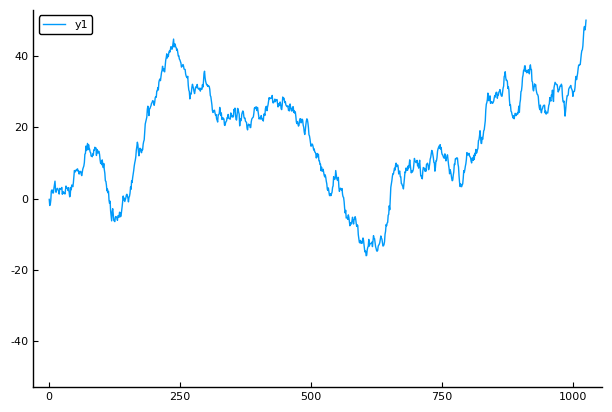

In [16]:
y = data["h0.6"]["L1024"]["z5"]
pyplot()
plot(y, yaxis=[-50,50], grid=false)
savefig("t.pdf")

In [12]:
# save("1dseries.jld", "data", data)

In [ ]:
# p1 = plot(xaxis=("L", :log10), yaxis=("Δz",:log10))
# for h in hursts
#     Δz = []
#     L = []
#     for scale in powers
#         Ls = convert(Int64,2.0^scale)
#         dz = 0
#         for s=1:5
#             dz += std(data["h$h"]["L$Ls"]["z$s"])
#         end
#         dz /= 5
#         push!(Δz, dz)
#         push!(L, Ls)
#     end
#     plot!(L, Δz, markershape=:circle, label=@sprintf "%0.2f" h)
#     plot!(L, (0.25/h).*L.^h, color=:black, label="")
# end
# plot(p1)


Self-affinity

\begin{equation} 
\left< |z(x_2) - z(x_1)|^2 \right> = \sigma^2 |x_2 - x_1|^{2H}
\end{equation}

\begin{equation} 
\left< |\Delta z|^2 \right> = \sigma^2 |\Delta x|^{2H}
\end{equation}

\begin{equation} 
L_p/L = \left( 1 + \frac{|\Delta z|^2 }{\Delta x^2}\right)^{1/2} = \left( 1 + \sigma^2 \frac{\Delta x^{2H} }{\Delta x^2}\right)^{1/2}
\end{equation}


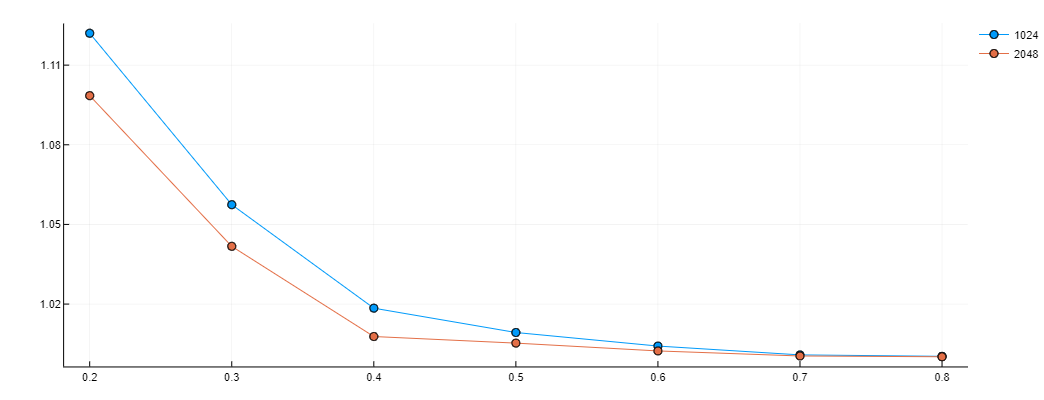

In [23]:
function perimenter(z, step=1)
    z2 =  z[1+step:step:end]
    z1 = z[1:step:end-step]
    δx = step.*ones(length(z1))
    Δz = z2 .- z1
    h = sqrt.(δx.^2 .+ Δz.^2)
    Lp = sum(h)/sum(δx)
end

p1=plot()
for p = 10:11
    L = convert(Int64, 2^p)
    Lp = []
    hurst = []
    for h=0.2:0.1:0.8
        per = 0.0
        for s=1:5
            z = data["h$h"]["L$L"]["z$s"]
            z = z./std(z)
            per += perimenter(z)
        end
        push!(Lp, per/5)
        push!(hurst, h)
    end
    plot!(hurst, (Lp.^2), markershape=:circle, label="$L")
end

plot(p1)